In [1]:
import numpy as np # linear algebra
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
import nltk
import heapq
%matplotlib inline

stopwords = stopwords.words('english')

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

nlp = spacy.load('en_core_web_lg')
def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>©', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", " ")

summ_article = {}
summ_article['article'] = []
summ_article['summary'] = []

In [37]:
import os

for articles, summaries in zip(os.walk('input/BBC News Summary/News Articles/business'), os.walk('input/BBC News Summary/Summaries/business')):
    for filename in zip(articles[2], summaries[2]):
        with open(os.path.join(articles[0], filename[0])) as fh:
            file = ""
            for line in fh:
                file += line
            summ_article['article'].append(file)
            
        with open(os.path.join(summaries[0], filename[1])) as fh:
            file = ""
            for line in fh:
                file += line
            summ_article['summary'].append(file)

df = pd.DataFrame(data=summ_article)

df.columns = ['article', 'summary']

# Any results you write to the current directory are saved as output.

In [54]:
df['cleaned_article_first_pass'] = df['article'].apply(normalize_text)
df['cleaned_summary_first_pass'] = df['summary'].apply(normalize_text)

In [55]:
df.head()

,article,summary,cleaned_article_first_pass,cleaned_summary_first_pass,article_cleaned,summary_cleaned,article_len,summary_len
0,UK economy facing 'major risks'\n\nThe UK manu...,"""Despite some positive news for the export sec...",UK economy facing 'major risks' The UK manufa...,"""Despite some positive news for the export sec...",uk economy face major risk uk manufacturing se...,uk economy face major risk uk manufacturing se...,219,219
1,Aids and climate top Davos agenda\n\nClimate c...,"At the same time, about 100,000 people are exp...",Aids and climate top Davos agenda Climate cha...,"At the same time, about 100,000 people are exp...",aid climate top davos agenda climate change fi...,aid climate top davos agenda climate change fi...,294,294
2,Asian quake hits European shares\n\nShares in ...,The unfolding scale of the disaster in south A...,Asian quake hits European shares Shares in Eu...,The unfolding scale of the disaster in south A...,asian quake hit european share share europe 's...,asian quake hit european share share europe 's...,401,401
3,India power shares jump on debut\n\nShares in ...,"Shares in India's largest power producer, Nati...",India power shares jump on debut Shares in In...,"Shares in India's largest power producer, Nati...",india power share jump debut share india 's la...,india power share jump debut share india 's la...,127,127
4,Lacroix label bought by US firm\n\nLuxury good...,LVMH said the French designer's haute couture ...,Lacroix label bought by US firm Luxury goods ...,LVMH said the French designer's haute couture ...,lacroix label buy us firm luxury good group lv...,lacroix label buy us firm luxury good group lv...,111,111


In [56]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~©'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)

df['article_cleaned'] = df['cleaned_article_first_pass'].apply(lambda x: cleanup_text(x, False))
df['summary_cleaned'] = df['cleaned_summary_first_pass'].apply(lambda x: cleanup_text(x, False))

In [57]:
df.head()

,article,summary,cleaned_article_first_pass,cleaned_summary_first_pass,article_cleaned,summary_cleaned,article_len,summary_len
0,UK economy facing 'major risks'\n\nThe UK manu...,"""Despite some positive news for the export sec...",UK economy facing 'major risks' The UK manufa...,"""Despite some positive news for the export sec...",uk economy face major risk uk manufacturing se...,despite positive news export sector worry sign...,219,219
1,Aids and climate top Davos agenda\n\nClimate c...,"At the same time, about 100,000 people are exp...",Aids and climate top Davos agenda Climate cha...,"At the same time, about 100,000 people are exp...",aid climate top davos agenda climate change fi...,"time 100,000 people expect converge brazilian ...",294,294
2,Asian quake hits European shares\n\nShares in ...,The unfolding scale of the disaster in south A...,Asian quake hits European shares Shares in Eu...,The unfolding scale of the disaster in south A...,asian quake hit european share share europe 's...,unfold scale disaster south asia little immedi...,401,401
3,India power shares jump on debut\n\nShares in ...,"Shares in India's largest power producer, Nati...",India power shares jump on debut Shares in In...,"Shares in India's largest power producer, Nati...",india power share jump debut share india 's la...,share india 's large power producer national t...,127,127
4,Lacroix label bought by US firm\n\nLuxury good...,LVMH said the French designer's haute couture ...,Lacroix label bought by US firm Luxury goods ...,LVMH said the French designer's haute couture ...,lacroix label buy us firm luxury good group lv...,lvmh say french designer 's haute couture read...,111,111


In [58]:
df['article_len'] = df['article_cleaned'].str.split().str.len()
df['summary_len'] = df['summary_cleaned'].str.split().str.len()

In [59]:
df.head()

,article,summary,cleaned_article_first_pass,cleaned_summary_first_pass,article_cleaned,summary_cleaned,article_len,summary_len
0,UK economy facing 'major risks'\n\nThe UK manu...,"""Despite some positive news for the export sec...",UK economy facing 'major risks' The UK manufa...,"""Despite some positive news for the export sec...",uk economy face major risk uk manufacturing se...,despite positive news export sector worry sign...,219,89
1,Aids and climate top Davos agenda\n\nClimate c...,"At the same time, about 100,000 people are exp...",Aids and climate top Davos agenda Climate cha...,"At the same time, about 100,000 people are exp...",aid climate top davos agenda climate change fi...,"time 100,000 people expect converge brazilian ...",294,166
2,Asian quake hits European shares\n\nShares in ...,The unfolding scale of the disaster in south A...,Asian quake hits European shares Shares in Eu...,The unfolding scale of the disaster in south A...,asian quake hit european share share europe 's...,unfold scale disaster south asia little immedi...,401,183
3,India power shares jump on debut\n\nShares in ...,"Shares in India's largest power producer, Nati...",India power shares jump on debut Shares in In...,"Shares in India's largest power producer, Nati...",india power share jump debut share india 's la...,share india 's large power producer national t...,127,53
4,Lacroix label bought by US firm\n\nLuxury good...,LVMH said the French designer's haute couture ...,Lacroix label bought by US firm Luxury goods ...,LVMH said the French designer's haute couture ...,lacroix label buy us firm luxury good group lv...,lvmh say french designer 's haute couture read...,111,40


No handles with labels found to put in legend.


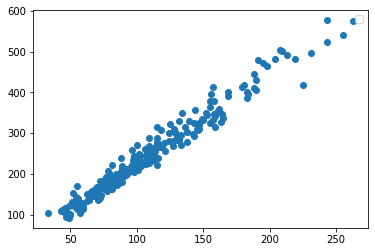

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
rev = df.groupby('article_len')['summary_len'].mean().reset_index()
# Using set_dashes() to modify dashing of an existing line
line1 = ax.scatter(rev['summary_len'], rev['article_len'])

ax.legend()
plt.show()

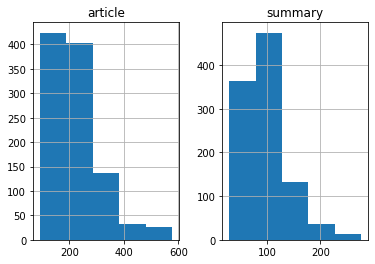

In [82]:
import matplotlib.pyplot as plt

graph_df= pd.DataFrame()
graph_df['article']=df['article_len']
graph_df['summary']=df['summary_len']

graph_df.hist(bins = 5)
plt.show()

In [68]:
# this is function for text summarization
def generate_summary(text_without_removing_dot, cleaned_text):
    sample_text = text_without_removing_dot
    doc = nlp(sample_text)
    sentence_list=[]
    for idx, sentence in enumerate(doc.sents): # we are using spacy for sentence tokenization
        sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))

    stopwords = nltk.corpus.stopwords.words('english')

    word_frequencies = {}  
    for word in nltk.word_tokenize(cleaned_text):  
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)


    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

    summary = ' '.join(summary_sentences)
    print("Original Text:\n")
    print(text_without_removing_dot)
    print('\n\nSummarized text:\n')
    print(summary)  

In [69]:
generate_summary(df['cleaned_article_first_pass'][8], df['article_cleaned'][8])

print('\n\n Original Summary:\n')
print(df['summary_cleaned'][8])

Original Text:

WorldCom director admits lying  The former chief financial officer at US telecoms firm WorldCom has admitted before a New York court that he used to lie to fellow board members.  Speaking at the trial of his former boss Bernard Ebbers, Scott Sullivan said he lied to the board to cover up the hole in WorldCom's finances. Mr Ebbers is on trial for fraud and conspiracy in relation to WorldCom's collapse in 2002. He pleads not guilty. The firm had been overstating its accounts by $11bn (£8.5bn). Mr Sullivan, 42, has already pleaded guilty to fraud and will be sentenced following Mr Ebbers' trial, where he is appearing as a prosecution witness. Mr Ebbers, 63, has always insisted that he was unaware of any hidden shortfalls in WorldCom's finances.  In the New York court on Wednesday, Mr Ebbers' lawyer Reid Weingarten asked Mr Sullivan: "If you believe something is in your interest, you are willing and able to lie to accomplish it, isn't that right?"  "On that date, yes. I was

In [72]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(np.array(df['article_cleaned']),
                                            np.array(df['summary_cleaned']),
                                            test_size=0.1,
                                            random_state=0,
                                            shuffle=True)


In [73]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

Using TensorFlow backend.


In [80]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)


% of rare words in vocabulary: 46.03992273019961
Total Coverage of rare words: 4.278937232859984


In [83]:
max_text_len=100
max_summary_len=100

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 5029


In [84]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [85]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 62.49800351381568
Total Coverage of rare words: 10.947478019435447


In [86]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 2349


In [88]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 5029
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     1005800     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
________________________________________________

In [89]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [90]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [91]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 918 samples, validate on 102 samples
Epoch 1/50
918/918 [==============================] - 82s 90ms/sample - loss: 6.6594 - val_loss: 5.6508
Epoch 2/50
918/918 [==============================] - 64s 69ms/sample - loss: 5.8001 - val_loss: 5.5440
Epoch 3/50
918/918 [==============================] - 64s 70ms/sample - loss: 5.6906 - val_loss: 5.4300
Epoch 4/50
918/918 [==============================] - 64s 70ms/sample - loss: 5.6359 - val_loss: 5.3419
Epoch 5/50
918/918 [==============================] - 65s 70ms/sample - loss: 5.4350 - val_loss: 5.2268
Epoch 6/50
918/918 [==============================] - 65s 70ms/sample - loss: 5.3716 - val_loss: 5.2237
Epoch 7/50
918/918 [==============================] - 65s 70ms/sample - loss: 5.3418 - val_loss: 5.1943
Epoch 8/50
918/918 [==============================] - 65s 71ms/sample - loss: 5.3221 - val_loss: 5.1890
Epoch 9/50
918/918 [========

KeyboardInterrupt: 